In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## EXAMPLE:FACE RECOGNITION

## Step1: Loading and Visualizing Data

In [2]:
from sklearn.datasets import fetch_lfw_people #datset of famous people along with name labels
faces=fetch_lfw_people(min_faces_per_person=60) #no of images we want of each person
print(faces.target_names)
print(faces.images.shape)#1348 distinct faces and each image has 62*47 pixels-=3000 pixels

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


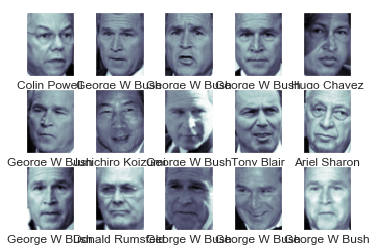

In [3]:

#imp subplot coding trick
fig,ax=plt.subplots(3,5) #ax is a numpy array of size 3*5 where each element of ax is a subplot object
for i,axi in enumerate(ax.flat):       #ax.flat return an array of 1*15 where each element is a subplot and enumerate return list of tuples of type (index of element,array element) and 15 such tuples generated
    axi.imshow(faces.images[i],cmap='bone')           #axi is each subplot and we plot a face and seaborn color palette is bone
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

## STEP2: PREPROCESSING DATA AND USING PCA FOR FEATURE EXTRACTION

In [4]:
#instead of using each of the 3000 pixels as a feature we use PCA to find 150 most vital features
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
pca=RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced') #class_weight =balanced means each feature is given equal weightage
model=make_pipeline(pca,svc)

## STEP3:TRAIN-TEST SPLIT

In [5]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)

## STEP4:GridSearch  to find best parameters gamma,C,etc and Train the optimum model 

In [6]:
from sklearn.model_selection import GridSearchCV
#grid parameters is a dictionary object where keys are the parameters and values are the different values of para
param_grid={'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,param_grid)
%time grid.fit(Xtrain,ytrain)   # %time gives time for Grid search to find the optimum parameters
print(grid.best_params_)

C:\Users\Ajinkeya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 31.4 s
{'svc__C': 10, 'svc__gamma': 0.001}


## STEP5: Testing stage and Visualizing Results

In [7]:
model=grid.best_estimator_  #(SVC with pca was obtained through pipeline and the grid search gave best paras and then this optimum model is called by best_estimator_)
yfit=model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect predictions in Red')

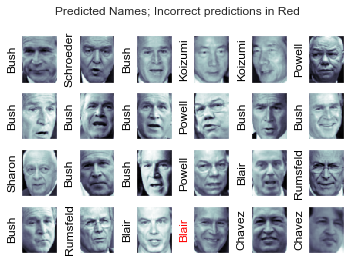

In [8]:
fig,ax=plt.subplots(4,6) #to display a few of the test images with labels
for i,axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i]==ytest[i] else 'red')   #the labels should be black if correct prediction and red if wrong prediction
fig.suptitle('Predicted Names; Incorrect predictions in Red')    #fig means control of entire figure of which the subplots are constituents
    

## STEP6: EVALUATION OF THE MODEL

In [9]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names)) #to see performance on each class label individually

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(89.18, 0.5, 'Predicted Label')

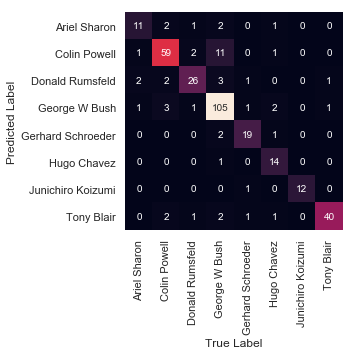

In [10]:
# to identify where our model is making most mistakes we plot a heatmap using seaborn on confusion matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest,yfit)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=faces.target_names,yticklabels=faces.target_names) 
plt.xlabel('True Label')
plt.ylabel('Predicted Label')